#Loading Cleaned Data

In [6]:
import pandas as pd

# Load files
benin = pd.read_csv('../data/cleaned/benin_clean.csv')
togo = pd.read_csv('../data/cleaned/togo_clean.csv')
sierraleone = pd.read_csv('../data/cleaned/sierraleone_clean.csv')

# Add country labels
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierraleone['Country'] = 'Sierra Leone'

# Combine into one DataFrame
df_all = pd.concat([benin, togo, sierraleone], ignore_index=True)

# Preview
print(df_all.head())
df_all.to_csv('../data/cleaned/combined_clean.csv', index=False)  # Optional for later use


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  ...  \
0  2021-08-09 00:01  0.0  0.0  0.0   0.0   0.0  26.2  93.4  0.0     0.4  ...   
1  2021-08-09 00:02  0.0  0.0  0.0   0.0   0.0  26.2  93.6  0.0     0.0  ...   
2  2021-08-09 00:03  0.0  0.0  0.0   0.0   0.0  26.2  93.7  0.3     1.1  ...   
3  2021-08-09 00:04  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.2     0.7  ...   
4  2021-08-09 00:05  0.0  0.0  0.0   0.0   0.0  26.2  93.3  0.1     0.7  ...   

   WDstdev   BP  Cleaning  Precipitation  TModA  TModB  Outlier_Flag  Country  \
0      0.0  998         0            0.0   26.3   26.2         False    Benin   
1      0.0  998         0            0.0   26.3   26.2         False    Benin   
2      1.5  997         0            0.0   26.4   26.2         False    Benin   
3      1.3  997         0            0.0   26.4   26.3         False    Benin   
4      1.0  997         0            0.0   26.4   26.3         False    Benin   

  Comments Outlier  
0      NaN 

#Boxplots and summary table

C:\Users\skibret\AppData\Local\Temp\ipykernel_8292\367330002.py:6: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('../data/cleaned/combined_clean.csv')
C:\Users\skibret\AppData\Local\Temp\ipykernel_8292\367330002.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


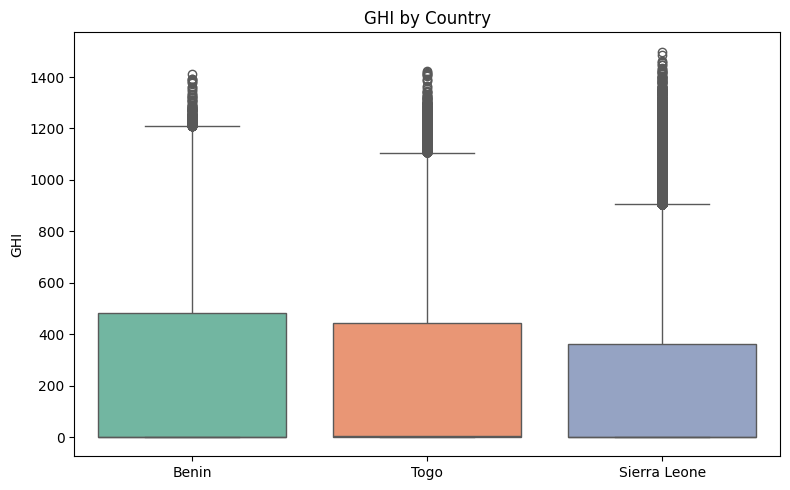

C:\Users\skibret\AppData\Local\Temp\ipykernel_8292\367330002.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


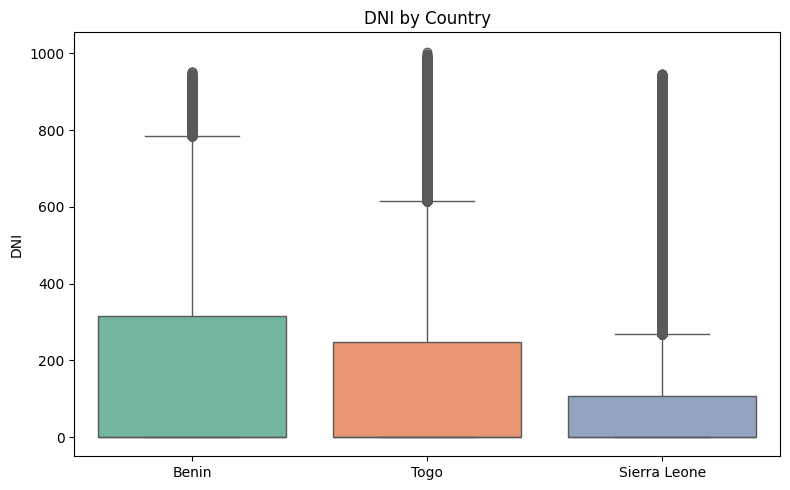

C:\Users\skibret\AppData\Local\Temp\ipykernel_8292\367330002.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


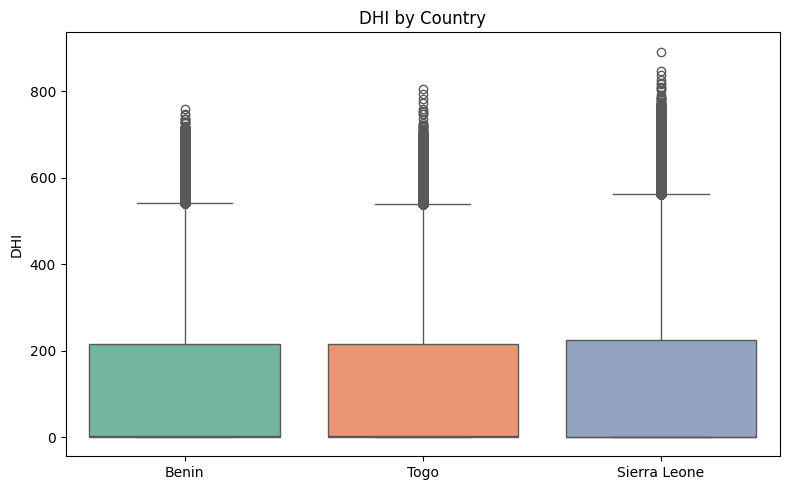

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         241.958821    1.8  330.101787  167.441866    0.0  261.547532   
Sierra Leone  204.406778    0.3  296.787520  116.523731    0.0  218.573992   
Togo          231.718786    2.1  321.691953  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         116.993033    1.6  157.463619  
Sierra Leone  116.273677    0.0  157.020868  
Togo          116.444352    2.5  156.520714

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load combined data
df_all = pd.read_csv('../data/cleaned/combined_clean.csv')

# Boxplots
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')
    plt.title(f'{metric} by Country')
    plt.ylabel(metric)
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

# Summary table
summary = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
display(summary)


#ANOVA/KRUSKAL-WALLIS

In [8]:
import pandas as pd
from scipy.stats import f_oneway, kruskal

# Load data
df_all = pd.read_csv('../data/cleaned/combined_clean.csv')

# Prepare GHI groups
groups = [df_all[df_all['Country'] == c]['GHI'] for c in df_all['Country'].unique()]

# One-way ANOVA
anova = f_oneway(*groups)
print(f"ANOVA - F-stat: {anova.statistic:.4f}, p-value: {anova.pvalue:.4f}")

# Kruskal-Wallis
kruskal_test = kruskal(*groups)
print(f"Kruskal-Wallis - H-stat: {kruskal_test.statistic:.4f}, p-value: {kruskal_test.pvalue:.4f}")


C:\Users\skibret\AppData\Local\Temp\ipykernel_8292\2044184873.py:5: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('../data/cleaned/combined_clean.csv')


ANOVA - F-stat: 1977.0703, p-value: 0.0000
Kruskal-Wallis - H-stat: 1377.9818, p-value: 0.0000


#P Values

In [10]:
from scipy.stats import kruskal

kruskal_result = kruskal(*groups)
print(f"Kruskal–Wallis p-value: {kruskal_result.pvalue:.4f}")

Kruskal–Wallis p-value: 0.0000


#Visual Summary

C:\Users\skibret\AppData\Local\Temp\ipykernel_8292\4096954753.py:6: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('../data/cleaned/combined_clean.csv')
C:\Users\skibret\AppData\Local\Temp\ipykernel_8292\4096954753.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')


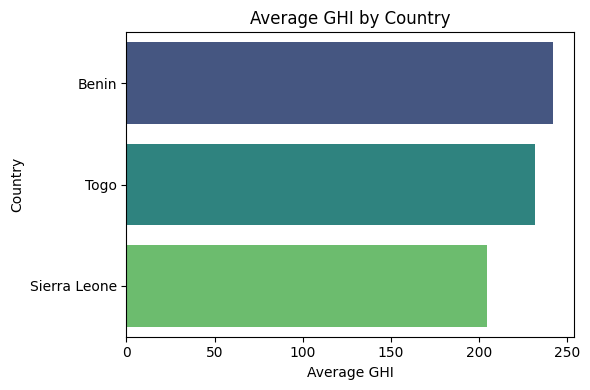

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load data
df_all = pd.read_csv('../data/cleaned/combined_clean.csv')

# Plot average GHI
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')
plt.title('Average GHI by Country')
plt.xlabel('Average GHI')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

#Key Observations

- Benin has the highest average GHI and DNI, indicating stronger and more direct solar potential compared to Sierra Leone and Togo
- Sierra Leone shows the lowest mean and median GHI/DNI, pointing to less reliable solar irradiance, likely due to frequent cloud cover or data issues
- All countries show very low medians but high standard deviations, implying high variability and a significant number of low-irradiance days